In [ ]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import nltk
nltk.download('stopwords')
from matplotlib import style
style.use('ggplot')
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
df = pd.read_csv('covid19.csv')
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,á‰áŽ¥â˜»Õ¬ê‚…Ï®,astroworld,wednesday addams as a disney princess keepin i...,26-05-2017 05:46,624,950,18775,False,25-07-2020 12:27,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile ðŸ‡ºðŸ‡¸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",16-04-2009 20:06,2253,1677,24,True,25-07-2020 12:27,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,28-02-2009 18:57,9275,9525,7254,False,25-07-2020 12:27,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,07-03-2019 01:45,197,987,1488,False,25-07-2020 12:27,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,ðŸ–Šï¸Official Twitter handle of Department o...,12-02-2017 06:45,101009,168,101,False,25-07-2020 12:27,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16299 entries, 0 to 16298
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   user_name         16299 non-null  object
 1   user_location     12998 non-null  object
 2   user_description  15422 non-null  object
 3   user_created      16299 non-null  object
 4   user_followers    16299 non-null  int64 
 5   user_friends      16299 non-null  int64 
 6   user_favourites   16299 non-null  int64 
 7   user_verified     16299 non-null  bool  
 8   date              16299 non-null  object
 9   text              16299 non-null  object
 10  hashtags          11556 non-null  object
 11  source            16297 non-null  object
 12  is_retweet        16299 non-null  bool  
dtypes: bool(2), int64(3), object(8)
memory usage: 1.4+ MB


In [ ]:
df.isnull().sum()

user_name              0
user_location       3301
user_description     877
user_created           0
user_followers         0
user_friends           0
user_favourites        0
user_verified          0
date                   0
text                   0
hashtags            4743
source                 2
is_retweet             0
dtype: int64

In [ ]:
df.columns

Index(['user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'is_retweet'],
      dtype='object')

In [ ]:
text_df = df.drop(['user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'hashtags', 'source', 'is_retweet'], axis=1)

In [ ]:
text_df.head()

,text
0,If I smelled the scent of hand sanitizers toda...
1,Hey @Yankees @YankeesPR and @MLB - wouldn't it...
2,@diane3443 @wdunlap @realDonaldTrump Trump nev...
3,@brookbanktv The one gift #COVID19 has give me...
4,25 July : Media Bulletin on Novel #CoronaVirus...


In [ ]:
text_df.tail()

,text
16294,An overview of The Innovative Learning Option ...
16295,Purgatory!\nOnly #Hell waits @BorisJohnson &am...
16296,Was surprised today by the amount of people ma...
16297,@realDonaldTrump @WhiteHouse @CDCgov @Mike_Pen...
16298,"U.S., Britain and Canada say Russian cyberspie..."


In [ ]:
print(text_df['text'].iloc[0],"\n")
print(text_df['text'].iloc[1],"\n")
print(text_df['text'].iloc[2],"\n")
print(text_df['text'].iloc[3],"\n")
print(text_df['text'].iloc[4],"\n")

If I smelled the scent of hand sanitizers today on someone in the past, I would think they were so intoxicated thatâ€¦ https://t.co/QZvYbrOgb0 

Hey @Yankees @YankeesPR and @MLB - wouldn't it have made more sense to have the players pay their respects to the Aâ€¦ https://t.co/1QvW0zgyPu 

@diane3443 @wdunlap @realDonaldTrump Trump never once claimed #COVID19 was a hoax. We all claim that this effort toâ€¦ https://t.co/Jkk8vHWHb3 

@brookbanktv The one gift #COVID19 has give me is an appreciation for the simple things that were always around meâ€¦ https://t.co/Z0pOAlFXcW 

25 July : Media Bulletin on Novel #CoronaVirusUpdates #COVID19 
@kansalrohit69 @DrSyedSehrish @airnewsalerts @ANIâ€¦ https://t.co/MN0EEcsJHh 



In [ ]:

text_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16299 entries, 0 to 16298
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    16299 non-null  object
dtypes: object(1)
memory usage: 127.5+ KB


In [ ]:
nltk.download('punkt')

# Assuming you have a list of stop words
stop_words = set(stopwords.words('english'))

# Assuming you have a DataFrame named text_df with a 'text' column
def data_processing(text):
    if isinstance(text, str):  # Check if the value is a string
        text = text.lower()
        text = re.sub(r"https\S+|www\S+https\S+", '', text, flags=re.MULTILINE)
        text = re.sub(r'\@\w+|\#', '', text)
        text = re.sub(r'[^\w\s]', '', text)
        text_tokens = word_tokenize(text)
        filtered_text = [w for w in text_tokens if not w in stop_words]
        return " ".join(filtered_text)
    else:
        return ""  # Replace non-string values with an empty string

# Apply the data_processing function to the 'text' column of text_df
text_df['text'] = text_df['text'].apply(data_processing)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
text_df = text_df.drop_duplicates('text')

In [ ]:
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data
text_df['text'] = text_df['text'].apply(lambda x: stemming(x))

In [ ]:
text_df.head()

,text
0,smelled scent hand sanitizers today someone pa...
1,hey wouldnt made sense players pay respects aâ
2,trump never claimed covid19 hoax claim effort toâ
3,one gift covid19 give appreciation simple thin...
4,25 july media bulletin novel coronavirusupdate...


In [ ]:
print(text_df['text'].iloc[0],"\n")
print(text_df['text'].iloc[1],"\n")
print(text_df['text'].iloc[2],"\n")
print(text_df['text'].iloc[3],"\n")
print(text_df['text'].iloc[4],"\n")

smelled scent hand sanitizers today someone past would think intoxicated thatâ 

hey wouldnt made sense players pay respects aâ 

trump never claimed covid19 hoax claim effort toâ 

one gift covid19 give appreciation simple things always around meâ 

25 july media bulletin novel coronavirusupdates covid19 



In [ ]:
def polarity(text):
    return TextBlob(text).sentiment.polarity
text_df['polarity'] = text_df['text'].apply(polarity)

In [ ]:
text_df.head(10)

,text,polarity
0,smelled scent hand sanitizers today someone pa...,-0.25
1,hey wouldnt made sense players pay respects aâ,0.00
2,trump never claimed covid19 hoax claim effort toâ,0.00
3,one gift covid19 give appreciation simple thin...,0.00
4,25 july media bulletin novel coronavirusupdate...,0.00
5,coronavirus covid19 deaths continue rise almos...,-0.70
6,covid19 change work general recruiting specifi...,0.05
7,wear face coverings shopping includes visit lo...,0.00
8,praying good health recovery covid19 covidposi...,0.70
9,pope god prophet sadhu sundar selvaraj watch h...,0.00


In [ ]:
def sentiment(label):
    if label <0:
        return "Negative"
    elif label ==0:
        return "Neutral"
    elif label>0:
        return "Positive"
text_df['sentiment'] = text_df['polarity'].apply(sentiment)

In [ ]:
text_df.head()

,text,polarity,sentiment
0,smelled scent hand sanitizers today someone pa...,-0.25,Negative
1,hey wouldnt made sense players pay respects aâ,0.00,Neutral
2,trump never claimed covid19 hoax claim effort toâ,0.00,Neutral
3,one gift covid19 give appreciation simple thin...,0.00,Neutral
4,25 july media bulletin novel coronavirusupdate...,0.00,Neutral


In [ ]:
vect = CountVectorizer(ngram_range=(1,2)).fit(text_df['text'])

In [ ]:
feature_names = vect.get_feature_names_out()
print("Number of features: {}\n".format(len(feature_names)))
print("First 20 features:\n {}".format(feature_names[:20]))

Number of features: 140311

First 20 features:
 ['000' '000 9999â' '000 covid19' '000 health' '0005010000gmt'
 '0005010000gmt coronavirus' '000bed' '000bed field' '001' '001 seconds'
 '0011300114' '0011300114 csmtshm' '0011500116' '0011500116 csmtmas'
 '003321' '003321 todays' '00â' '01' '01 global' '010']


In [ ]:
import pickle
# Save the trained model as a pickle file
with open('vector.pkl', 'wb') as f:
    pickle.dump(vect, f)

In [ ]:
X = text_df['text']
Y = text_df['sentiment']
X = vect.transform(X)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
print("Size of x_train:", (x_train.shape))
print("Size of y_train:", (y_train.shape))
print("Size of x_test:", (x_test.shape))
print("Size of y_test:", (y_test.shape))

Size of x_train: (12108, 140311)
Size of y_train: (12108,)
Size of x_test: (3027, 140311)
Size of y_test: (3027,)


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.svm import SVC

# Create and train the model
svm_model = SVC(kernel='linear', C=10)
svm_model.fit(x_train, y_train)

# Make predictions
svm_pred = svm_model.predict(x_test)

# Evaluate the model
svm_acc = accuracy_score(svm_pred, y_test)
print("SVM Test accuracy: {:.2f}%".format(svm_acc*100))


SVM Test accuracy: 85.83%


In [ ]:
# Assuming you've already trained and predicted using the svm_model
svm_pred = svm_model.predict(x_test)

# Confusion Matrix
svm_cm = confusion_matrix(y_test, svm_pred)
print("SVM Confusion Matrix:")
print(svm_cm)
print("\n")

# Classification Report
svm_report = classification_report(y_test, svm_pred)
print("SVM Classification Report:")
print(svm_report)


SVM Confusion Matrix:
[[ 278  137   58]
 [   3 1292   12]
 [  23  196 1028]]


SVM Classification Report:
              precision    recall  f1-score   support

    Negative       0.91      0.59      0.72       473
     Neutral       0.80      0.99      0.88      1307
    Positive       0.94      0.82      0.88      1247

    accuracy                           0.86      3027
   macro avg       0.88      0.80      0.82      3027
weighted avg       0.87      0.86      0.85      3027



In [ ]:
from sklearn.naive_bayes import MultinomialNB

# Create and train the model
nb_model = MultinomialNB()
nb_model.fit(x_train, y_train)

# Make predictions
nb_pred = nb_model.predict(x_test)

# Evaluate the model
nb_acc = accuracy_score(nb_pred, y_test)
print("Multinomial Naive Bayes Test accuracy: {:.2f}%".format(nb_acc*100))


Multinomial Naive Bayes Test accuracy: 75.09%


In [ ]:
# Assuming you've already trained and predicted using the nb_model
nb_pred = nb_model.predict(x_test)

# Confusion Matrix
nb_cm = confusion_matrix(y_test, nb_pred)
print("Multinomial Naive Bayes Confusion Matrix:")
print(nb_cm)
print("\n")

# Classification Report
nb_report = classification_report(y_test, nb_pred)
print("Multinomial Naive Bayes Classification Report:")
print(nb_report)


Multinomial Naive Bayes Confusion Matrix:
[[ 196  118  159]
 [  81 1011  215]
 [  45  136 1066]]


Multinomial Naive Bayes Classification Report:
              precision    recall  f1-score   support

    Negative       0.61      0.41      0.49       473
     Neutral       0.80      0.77      0.79      1307
    Positive       0.74      0.85      0.79      1247

    accuracy                           0.75      3027
   macro avg       0.72      0.68      0.69      3027
weighted avg       0.75      0.75      0.74      3027



In [ ]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_pred = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 83.25%


In [ ]:
print(confusion_matrix(y_test, logreg_pred))
print("\n")
print(classification_report(y_test, logreg_pred))

[[ 230  179   64]
 [   1 1293   13]
 [  17  233  997]]


              precision    recall  f1-score   support

    Negative       0.93      0.49      0.64       473
     Neutral       0.76      0.99      0.86      1307
    Positive       0.93      0.80      0.86      1247

    accuracy                           0.83      3027
   macro avg       0.87      0.76      0.79      3027
weighted avg       0.85      0.83      0.82      3027



In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create and train the model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x_train, y_train)

# Make predictions
rf_pred = rf_model.predict(x_test)

# Evaluate the model
rf_acc = accuracy_score(rf_pred, y_test)
print("Random Forest Test accuracy: {:.2f}%".format(rf_acc*100))

Random Forest Test accuracy: 86.92%


In [ ]:
# Assuming you've already trained and predicted using the rf_model
rf_pred = rf_model.predict(x_test)

# Confusion Matrix
rf_cm = confusion_matrix(y_test, rf_pred)
print("Random Forest Confusion Matrix:")
print(rf_cm)
print("\n")

# Classification Report
rf_report = classification_report(y_test, rf_pred)
print("Random Forest Classification Report:")
print(rf_report)


Random Forest Confusion Matrix:
[[ 278  120   75]
 [   1 1291   15]
 [  18  167 1062]]


Random Forest Classification Report:
              precision    recall  f1-score   support

    Negative       0.94      0.59      0.72       473
     Neutral       0.82      0.99      0.89      1307
    Positive       0.92      0.85      0.89      1247

    accuracy                           0.87      3027
   macro avg       0.89      0.81      0.83      3027
weighted avg       0.88      0.87      0.86      3027



In [ ]:
import pickle
# Save the trained model as a pickle file
with open('model.pkl', 'wb') as f:
    pickle.dump(rf_model, f)

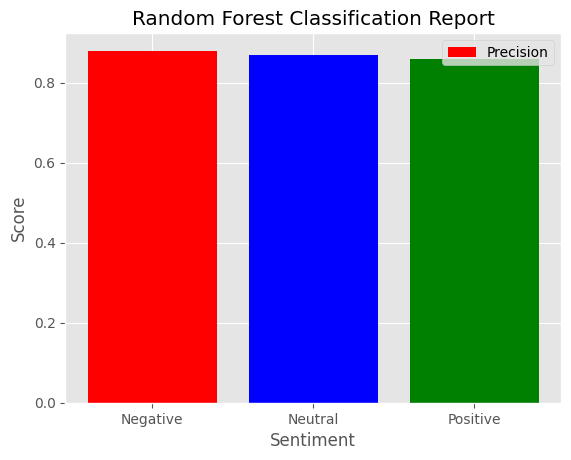

In [ ]:
# Assuming you've already generated the rf_report
rf_precision, rf_recall, rf_f1_score, _ = map(float, rf_report.split()[-4:])
classes = ['Negative', 'Neutral', 'Positive']

plt.bar(classes, [rf_precision, rf_recall, rf_f1_score], color=['red', 'blue', 'green'])
plt.title("Random Forest Classification Report")
plt.xlabel("Sentiment")
plt.ylabel("Score")
plt.legend(['Precision', 'Recall', 'F1-Score'])
plt.show()
